# Surface Reflectance Calculation for 831
## AKA:MOD09GQ.A2016084.h10v05.006.2016104022831.hdf

#### Importing Packages

In [6]:
import rasterio                      #For .hdf Processing and Vizualization
import matplotlib                    #For Plotting Stylization
import numpy as np                   #For Calulations
import matplotlib.pyplot as plt      #For Plotting
import matplotlib.patches as patches #For Image Overlays
import gdal                          #This is for using hdf files

#### Graph Formatting

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14 #Setting Figure Size in first dimension
fig_size[1] = 10 #Setting Figure Size in second dimension
plt.rcParams["figure.figsize"] = fig_size #Applying the parameters

font = {'family':'Times New Roman', #Setting the font characteristics
        'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font) #Applying the font

## Importing the .hdf files with GDAL

In [10]:
%%capture 

M831= 'hdf/MOD09GQ.A2016084.h10v05.006.2016104022831.hdf' #Surface Reflectance

!gdal_translate -sds $M831 tif/M831.tif

## Surface Reflectance Plots

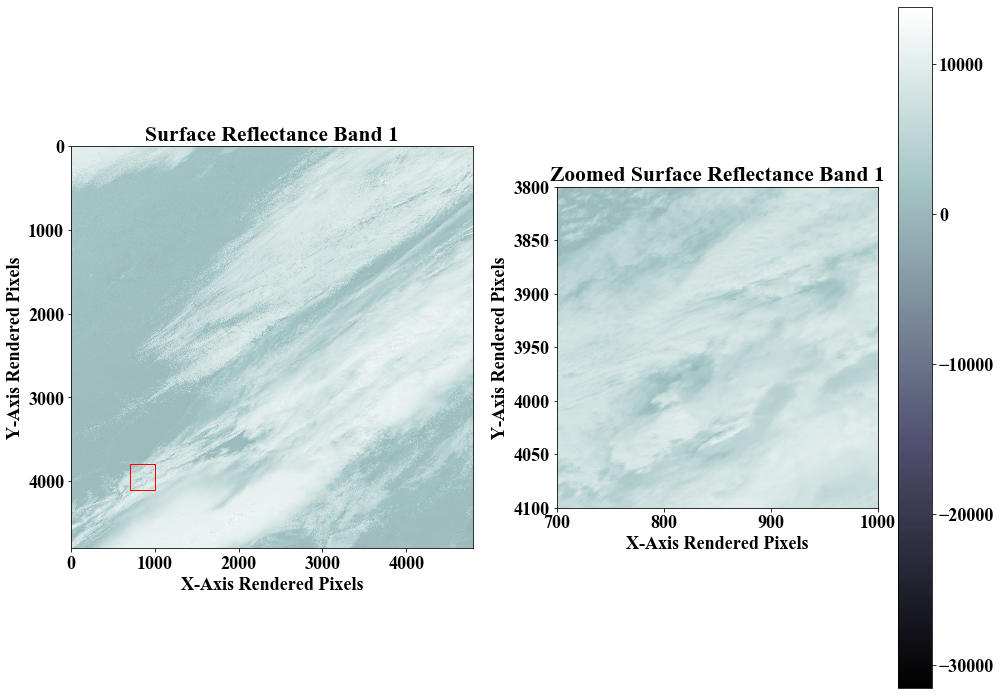

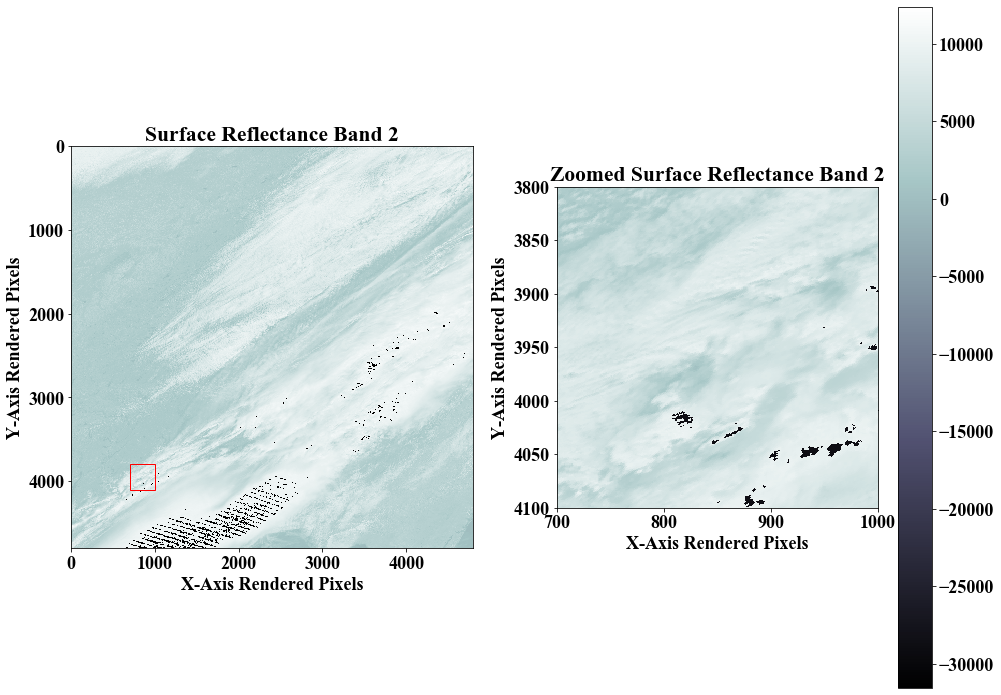

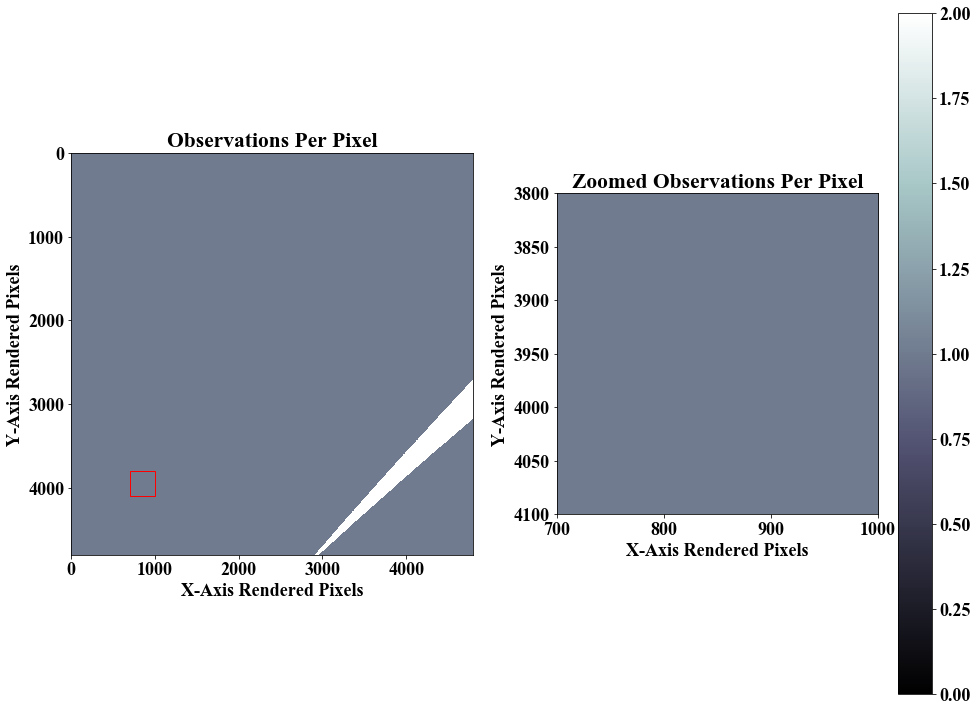

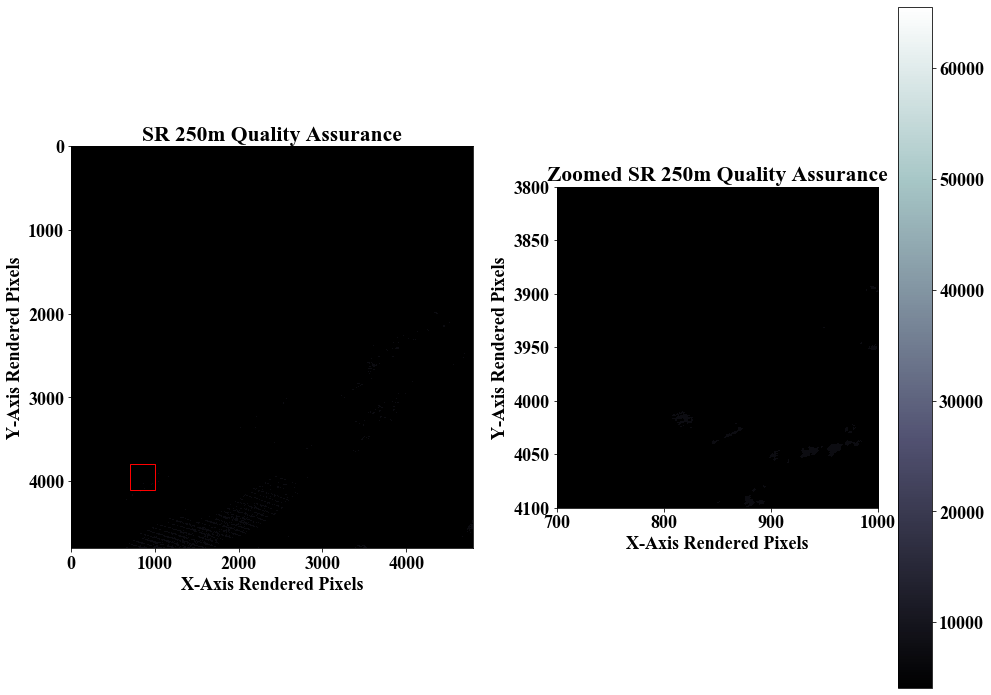

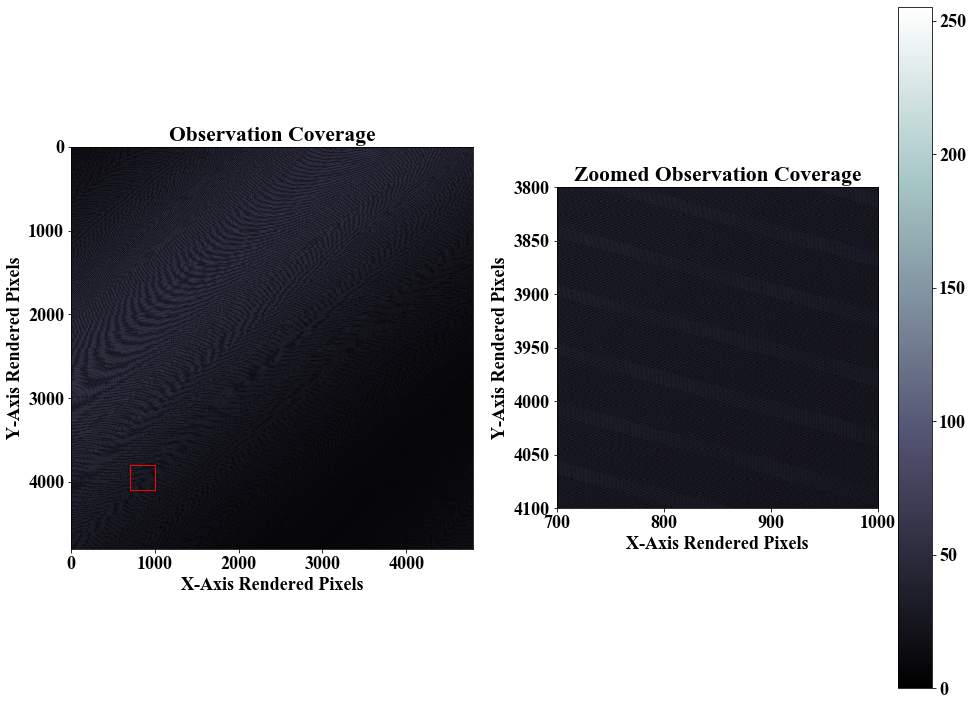

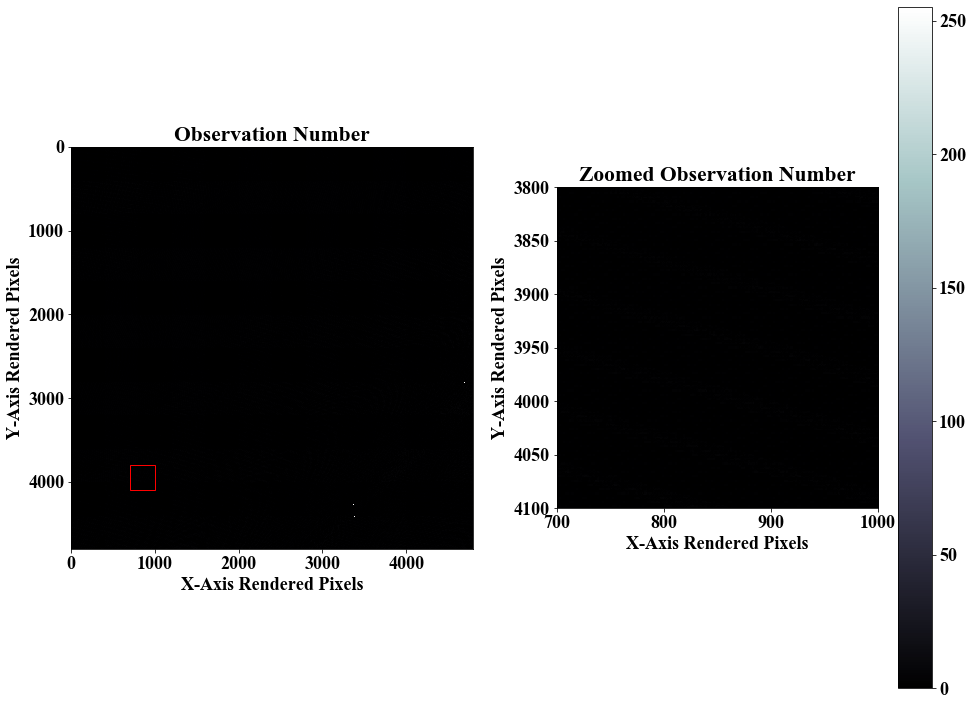

In [11]:
M831_1 = gdal.Open("tif/M831_1.tif").ReadAsArray()
M831_2 = gdal.Open("tif/M831_2.tif").ReadAsArray()
M831_3 = gdal.Open("tif/M831_3.tif").ReadAsArray()
M831_4 = gdal.Open("tif/M831_4.tif").ReadAsArray()
M831_5 = gdal.Open("tif/M831_5.tif").ReadAsArray()
M831_6 = gdal.Open("tif/M831_6.tif").ReadAsArray()
M831_7 = gdal.Open("tif/M831_7.tif").ReadAsArray()
M831_8 = gdal.Open("tif/M831_8.tif").ReadAsArray()

def InfPlot (source,name):
    #Plotting The Overall Image
    ax = plt.subplot(1, 2, 1)
    ax.imshow(source)
    rect = patches.Rectangle((700,3800),300,300,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect) # Add the patch to the Axes
    plt.title(name)
    plt.set_cmap('bone')
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')

    # Plotting The Specific Fire Location Area
    plt.subplot(1, 2, 2)
    plt.imshow(source)
    plt.xlim(700,1000) #For setting x-axis limits
    plt.ylim(4100,3800) #For setting y-axis limits
    plt.title('Zoomed ' + name)
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')
    plt.tight_layout()
    plt.set_cmap('bone')
    plt.colorbar()
    plt.show()
    
InfPlot(M831_2,'Surface Reflectance Band 1')
InfPlot(M831_3,'Surface Reflectance Band 2')
InfPlot(M831_1,'Observations Per Pixel')
InfPlot(M831_4,'SR 250m Quality Assurance')
InfPlot(M831_5,'Observation Coverage')
InfPlot(M831_6,'Observation Number')
#InfPlot(M831_7,'Orbit Pointer')
#InfPlot(M831_8,'Granule Pointer')


## Calculating Image Information

In [12]:
def IStat (image):
    print('Image Information for',image)
    #Calculating the Area of the Images in Projected Units
    sat_data = rasterio.open(image)
    width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
    height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom
    print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))
    print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

    # Upper left pixel
    row_min = 0
    col_min = 0

    # Lower right pixel.  Rows and columns are zero indexing.
    row_max = sat_data.height - 1
    col_max = sat_data.width - 1

    # Transform coordinates with the dataset's affine transformation.
    topleft = sat_data.transform * (row_min, col_min)
    botright = sat_data.transform * (row_max, col_max)

    print("Top left corner coordinates: {}".format(topleft))
    print("Bottom right corner coordinates: {}".format(botright))
    print(sat_data.count)

    # Sequence of band indexes
    print(sat_data.indexes)
    print(" ")

IStat("tif/M831_2.tif")

Image Information for tif/M831_2.tif
Width: 1111950.5196659993, Height: 1111950.519667
Rows: 4800, Columns: 4800
Top left corner coordinates: (-8895604.157333, 4447802.078667)
Bottom right corner coordinates: (-7783885.294025264, 3336083.215358264)
1
(1,)
 
